# Example 5: Estimating parameters using a priori constraints on `zt`

In the previous example we mapped the four model parameters (`A`, `zt`, `dz`, and `beta`) over the entire grid.  In this final example we will fix the model parameter `zt` obtained independently and re-estimate the parameters. This is done through a new `ZtGrid` object that also inherits from the `PlateFlex` `Grid` class. In this example we use the sedimentary thickness map `SEDMAP` from [Laske and Masters](https://igppweb.ucsd.edu/~gabi/sediment.html) as an estimate of `zt`, as in [Gaudreau et al. (2019)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2018JB016726).

We will perform the inversion twice: a first time by estmating `beta` and a second time by fixing it to some pre-defined (arbitrary value). Furthermore, we will change the wavelet parameter `k0` to `10` to be consistent with the paper by Gaudreau et al. (2019).

<div class="alert alert-block alert-warning">
<b>Warning:</b> Be careful to ensure that all the data sets have the same grid specifications (i.e., registration, shape, sampling distance, etc.)!!
</div>

grid contains NaN values. Performing interpolation...


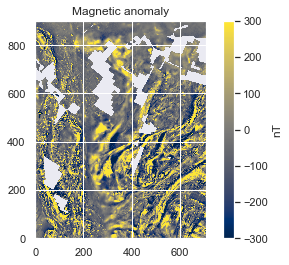

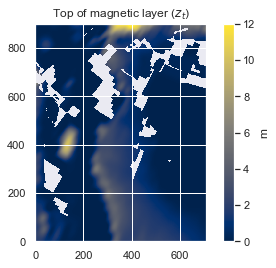

In [2]:
import numpy as np
import pandas as pd
from platecurie import MagGrid, ZtGrid, Project

# Change wavelet parameter k0
import platecurie
platecurie.set_conf_cpwt(k0=10.)

xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)
nx = int(nx); ny = int(ny)

magdata = pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]
seddata = pd.read_csv('../data/Sed_NWCAN.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

magdata[magdata<-750] = np.nan
magdata[magdata>1000] = np.nan

# Load the data into a MagGrid object
mag = MagGrid(magdata, dx, dy)

# Load the data into a ZtGrid object
sed = ZtGrid(seddata, dx, dy)

# Generate a mask
mask = (magdata==0)

# Plot both magnetic anomaly data and sediment thickness data
mag.plot(mask=mask, vmin=-300, vmax=300, cmap='cividis')
sed.plot(mask=mask, vmin=0., vmax=12., cmap='cividis')

Load grids into Project and initialize it

In [3]:
# Load grids into Project and initialize it
project = Project(grids=[mag, sed])
project.init()

# Store mask as attribute
project.mask = mask

Wavelet scalogram 
Initialization: Using zt as fixed parameter


Estimate parameters over entire grid

Computing: [##########] 90/90


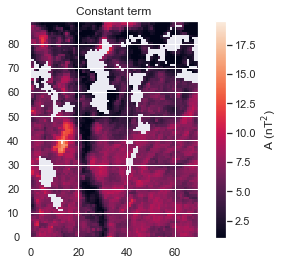

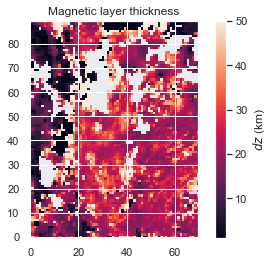

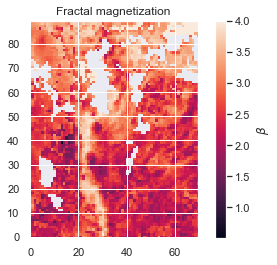

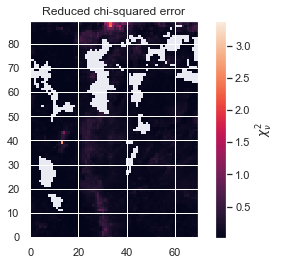

In [4]:
# Estimate model parameters 
project.estimate_grid(10)

# Plot all maps simultaneously
project.plot_results(mean_A=True, mean_dz=True, mean_beta=True, chi2=True, mask=True)

Let's do the same but with `beta` fixed to 2.5

Computing: [##########] 90/90


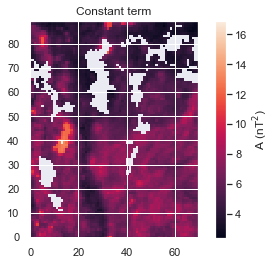

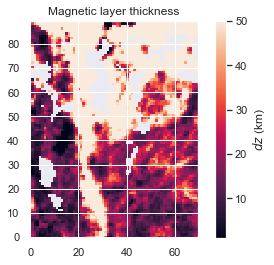

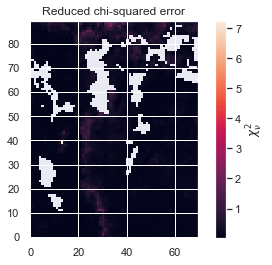

In [6]:
# Estimate model parameters 
project.estimate_grid(10, fix_beta=2.5)

# Plot all maps simultaneously
project.plot_results(mean_A=True, mean_dz=True, chi2=True, mask=True)